In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from numpy import polynomial as P
import matplotlib.pyplot as plt 
import math

from approximate import approx_sign

In [5]:
def _exp(x, a=1):
    return a*(np.exp(x)-1)

def ELU(x, a=1):
    return np.piecewise(x, [x<0, x>=0], [lambda x:_exp(x,a=a), lambda x:x])

xx = np.linspace(-35, 28, 500)

degs = [5,5,5,7]
for deg in degs:
    chev = P.chebyshev.Chebyshev.fit(xx, ELU(xx), deg=32) # F.elu
    

chev = P.chebyshev.Chebyshev.fit(xx, ELU(xx), deg=32) # F.elu
power = chev.convert(kind=P.Polynomial)

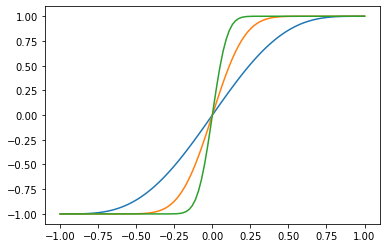

In [6]:
x1 = np.linspace(-1,1,100)

ff = approx_sign(3)

plt.plot(x1, ff(x1))
plt.plot(x1, ff(ff(x1)))
plt.plot(x1, ff(ff(ff(x1))))

[-1,1]에서 sign function을 approximate 하는건 그리 어렵지 않음. 

1. x in [-35, +35] 라면..? 

-0.3635521347533349


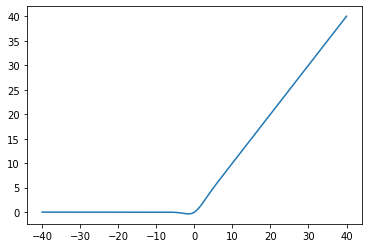

In [9]:
# Approximate ReLU
ff = approx_sign(4)
#sgn = ff(ff(ff))

def sgn2(x):
    return ff(ff(x))

def sgn3(x):
    return ff(ff(ff(x)))

def apprx_relu(x):
    return x*(sgn3(x)+1)/2 

xfactor = 40
x1 = np.linspace(-xfactor,xfactor,500)
plt.plot(x1, xfactor*apprx_relu(x1/xfactor))

print(min(xfactor*apprx_relu(x1/xfactor)))

이 정도면 될듯..? 